In [3]:
import sympy as sp
%pylab notebook

h=6.62607004e-34 #Plancks constant #m2 kg / s
k=1.38064852e-23 #Boltzmann constant #m2 kg s-2 K-1
x=linspace(10,3000,1000)

Populating the interactive namespace from numpy and matplotlib


In [4]:
nu,nu0,s,beta,c0=sp.symbols("nu nu0 s beta c0")

mbb=((nu/nu0)**s)*(nu**3.)/(sp.exp(c0*nu*beta)-1.)

def mbb_der(der_beta=0,der_s=0):
    expr=mbb.diff(beta,der_beta)*mbb.diff(s,der_s)*(beta**der_beta)/mbb
    return expr

def taylor_series(n):
    fn=0
    for i in range(n+1):
        for j in range(n+1):
            if i+j<=n:
                #print i,j
                fn = fn + mbb_der(i,j)
    return fn

def taylor_term(n):
    fn=0
    for i in range(n+1):
        for j in range(n+1):
            if i+j==n:
                fn = fn + mbb_der(i,j)
    return fn

In [5]:
def nmbb(nu,T,alpha,nu0=1.):
    x=h*nu*1e9/(k*T)
    Inu=((nu/nu0)**alpha)*(nu**3.)/(exp(x)-1.)
    return Inu

n=0
fn=sp.lambdify((nu,beta,s,nu0,c0),mbb_der(0,0),modules="numpy")

In [6]:
T=15. ; slope=0.
y=nmbb(x,T,slope)
y1=fn(x,1./T,slope,1.,h*1e9/k)

<IPython.core.display.Javascript object>


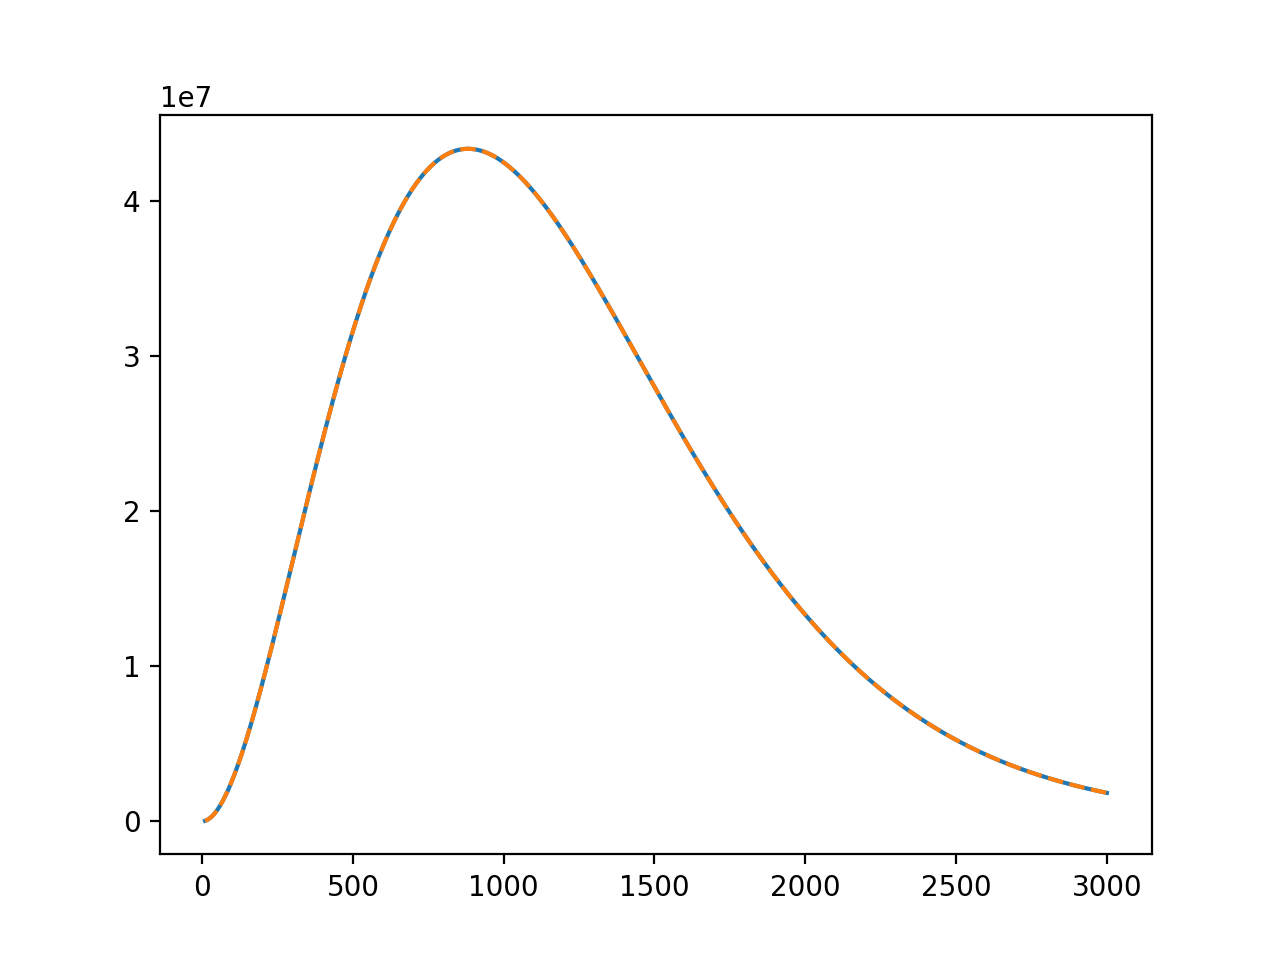

In [7]:
figure()
plot(x,y)
plot(x,y1,"--")

In [19]:
d_order=10
v=list()
T=15. ; slope=1.5 ; 
for n in range(d_order+1):
    for i in range(n+1):
        for j in range(n+1): 
            if i+j==n:
                #print n,i,j
                fn=sp.lambdify((nu,beta,s,nu0,c0),mbb_der(i,j),modules="numpy")
                temp_v=fn(x,1./T,slope,k*T/h/1e9,h*1e9/k) ; temp_v=temp_v/max(abs(temp_v))
                v.append(temp_v)

<IPython.core.display.Javascript object>


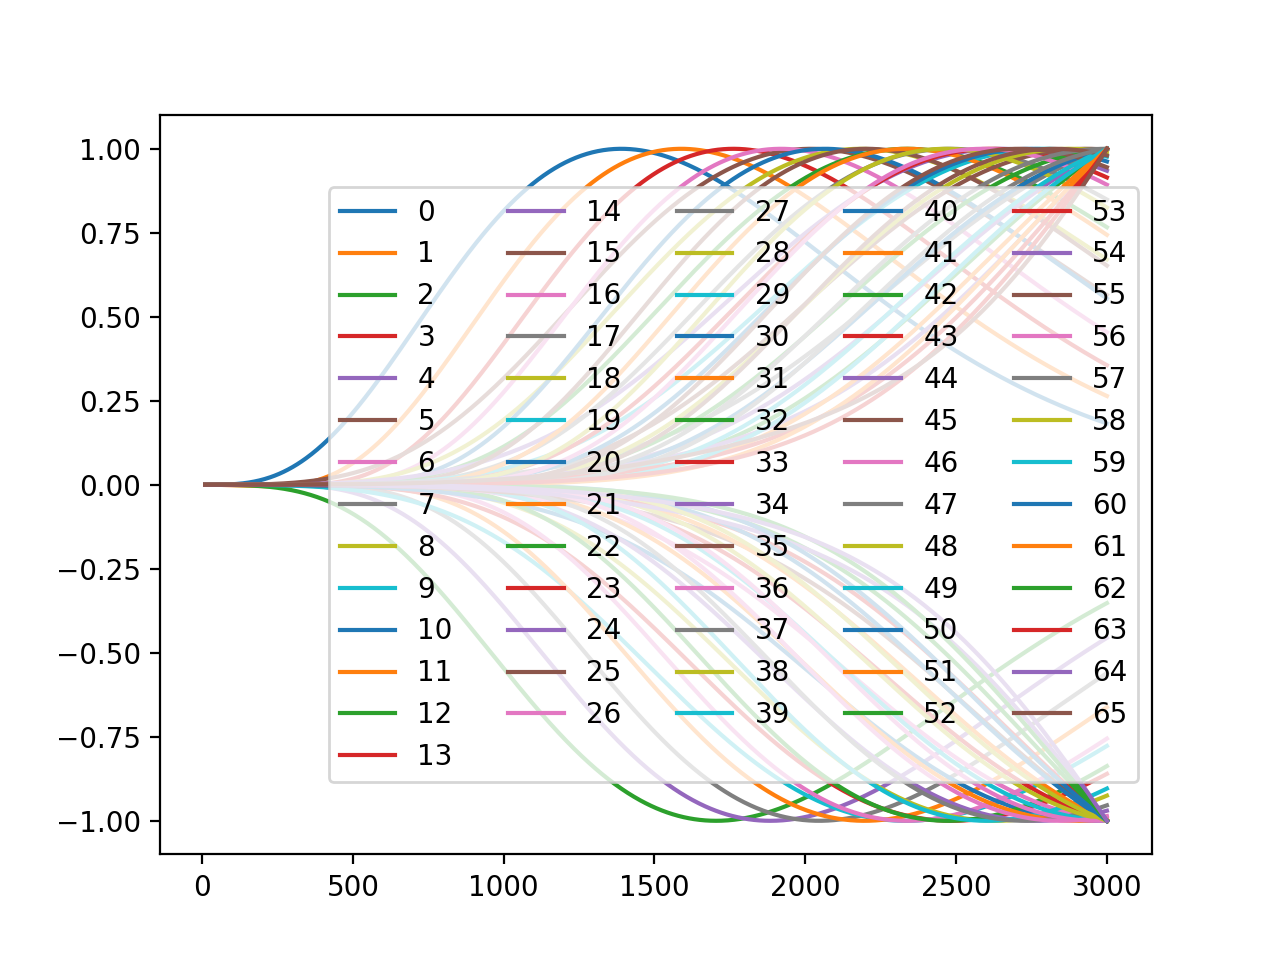

In [20]:
figure()
for i in range(shape(v)[0]):
    plot(x,v[i],label=str(i))
legend(loc=0,ncol=5)

In [21]:
def gram_schmidt(vectors):
    basis = []
    un_basis = []
    for v in vectors:
        w = v - np.sum( np.dot(v,b)*b  for b in basis )
        un_basis.append(w)
        
        #Calculate the norm for w-vector.
        norm=np.sqrt(np.dot(w,w)) #; print norm
        
        #Normalize vector.
        if (norm > 1e-12):  
            basis.append(w/norm)         
    return np.array(un_basis),np.array(basis)

def gram_schmidt_iterative(vectors,tol=1e-12,iter=100):
    normalize=True ; counter=0
    while normalize:
        print counter
        un_basis,basis=gram_schmidt(vectors) ; normalize=False
        
        if iter>counter:
            un_basis,basis_new=gram_schmidt(basis)
            
            norm=[]
            for i in range(np.shape(un_basis)[0]):
                norm=np.append(norm,np.dot(un_basis[i,:],un_basis[i,:]))    
            print abs(norm-1.)/tol
            
            if (abs(norm-1.)>tol).any() or counter==iter:
                vectors=basis
                normalize=True
                counter=counter+1       
    return basis

0
[  0.00000000e+00   2.22044605e-04   2.22044605e-04   0.00000000e+00
   3.33066907e-04   1.11022302e-04   0.00000000e+00   2.00617301e-01
   1.91769427e+04   1.14509161e+08   1.24446873e+09   2.45106911e+11
   9.99408189e+11   9.99998672e+11   9.99889770e+11   9.99929424e+11
   9.99999957e+11   9.99999996e+11   1.00000000e+12   1.00000000e+12
   1.00000000e+12   9.99999869e+11   9.99999998e+11   9.99999991e+11
   9.99999990e+11   9.99999988e+11   9.99999986e+11   9.99999984e+11
   9.99997433e+11   9.99999989e+11   9.99999990e+11   9.99999991e+11
   9.99999992e+11   9.99999993e+11   9.99999994e+11   9.99999994e+11
   9.99926513e+11   9.99999923e+11   9.99999924e+11   9.99999915e+11
   9.99999907e+11   9.99999900e+11   9.99999893e+11   9.99999888e+11
   9.99999883e+11   9.98261210e+11   9.99999401e+11   9.99999270e+11
   9.99999210e+11   9.99999165e+11   9.99999133e+11   9.99999110e+11
   9.99999095e+11   9.99999089e+11   9.99999089e+11   9.99993761e+11
   9.99999124e+11   9.99999065e+

<IPython.core.display.Javascript object>


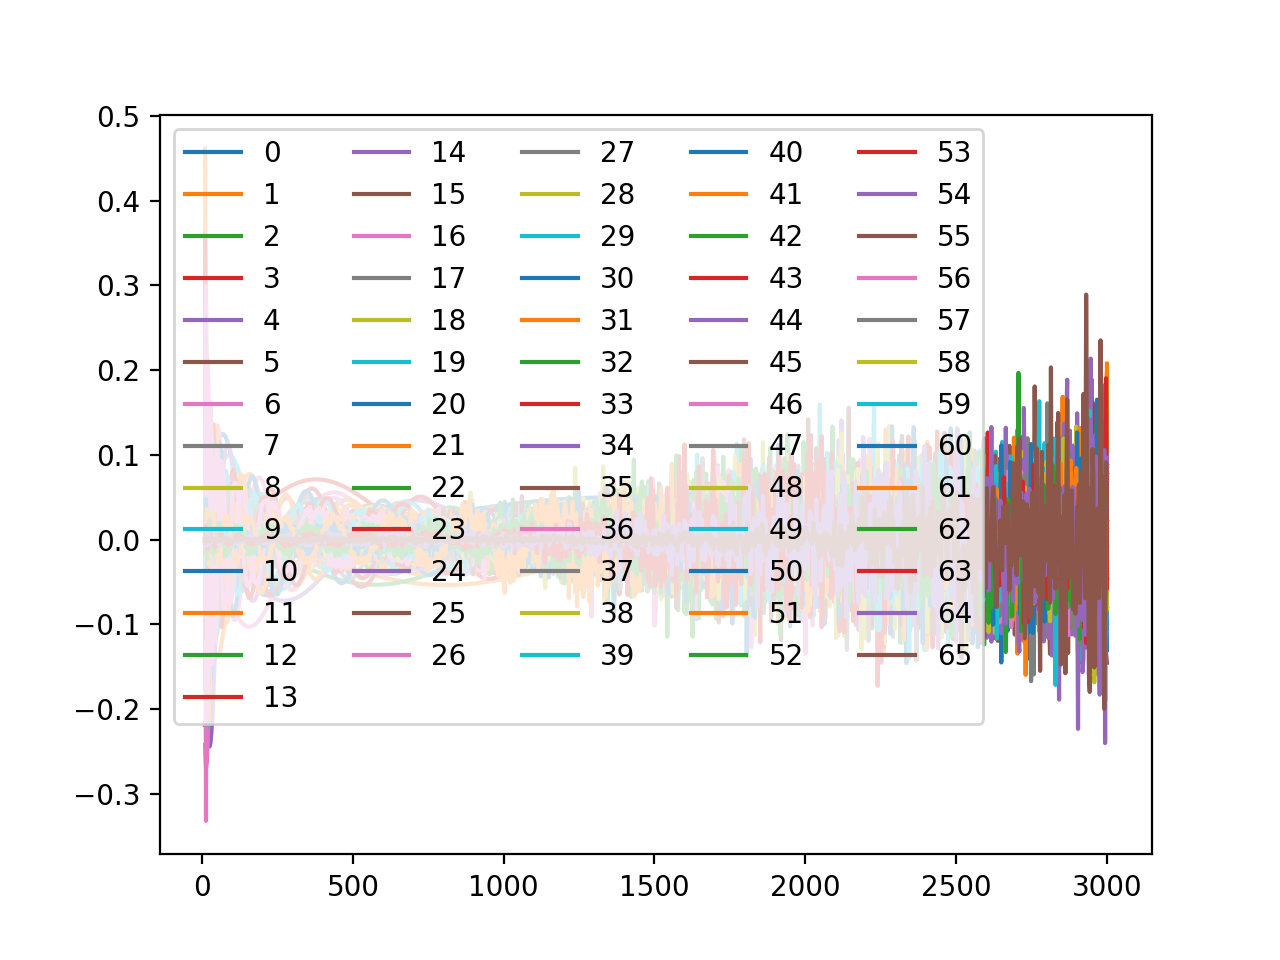

<IPython.core.display.Javascript object>


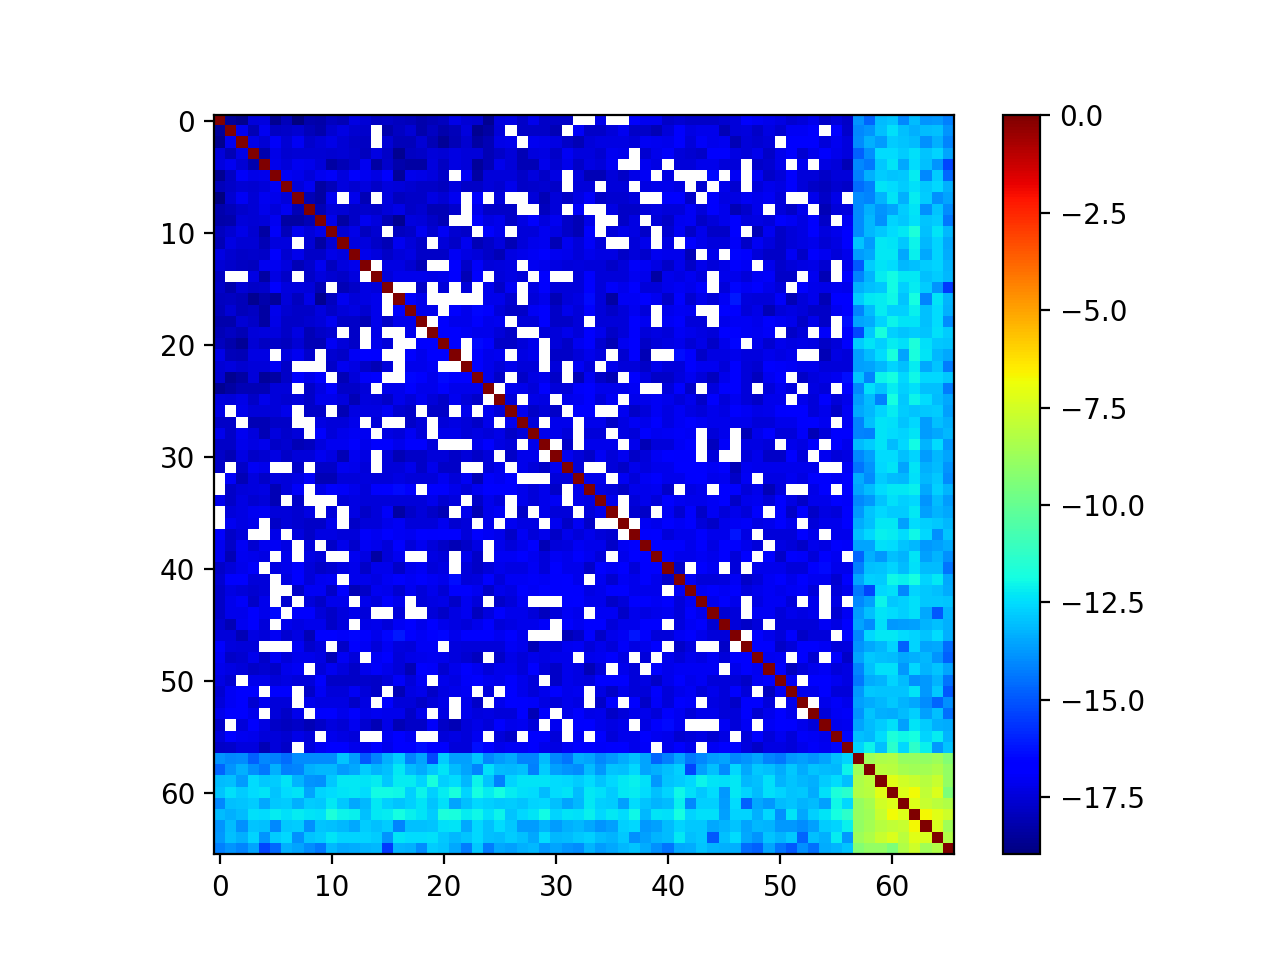

/Users/adityarotti/Library/Enthought/Canopy/edm/envs/User/lib/python2.7/site-packages/ipykernel/__main__.py:14: RuntimeWarning: divide by zero encountered in log10


In [23]:
b=gram_schmidt_iterative(v,tol=1e-12)

figure()
for i in range(shape(b)[0]):
    plot(x,b[i],label=str(i))
legend(loc=0,ncol=5)

cov=zeros((shape(b)[0],shape(b)[0]),float)
for i in range(shape(b)[0]):
    for j in range(shape(b)[0]):
        cov[i,j]=np.dot(b[i],b[j])
        
figure()
imshow(log10(abs(cov)))
colorbar()